In [117]:
library(repr)
library(mice)
library(dplyr)
library(Rmisc)
library(ggplot2)
library(data.table)
df =fread('cleaned.csv')

In [119]:
str(df)
df$Episodes <- as.numeric(df$Episodes)
levels(as.factor(df$Season))

Classes 'data.table' and 'data.frame':	3371 obs. of  11 variables:
 $ V1      : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Name    : chr  "Patalliro!" "Mahou no Princess Minky Momo" "Kikou Kantai Dairugger XV" "Ochamegami Monogatari: Korokoro Pollon" ...
 $ Studio  : chr  "Toei Animation" "Production Reed" "Toei Animation" "-" ...
 $ Episodes: chr  "49" "63" "52" "46" ...
 $ Genres  : chr  "[Adventure, Comedy, Romance, Shoujo, Shounen Ai]" "[Magic, Shoujo]" "[Action, Adventure, Mecha, Sci-Fi, Shounen]" "[Parody, Magic, Comedy]" ...
 $ Source  : chr  "Manga" "Original" "-" "Manga" ...
 $ Type    : chr  "TV" "TV" "TV" "TV" ...
 $ Score   : num  7.62 6.77 6.56 7.13 6.38 ...
 $ Members : chr  "2,748" "2,524" "1,228" "1,169" ...
 $ Season  : chr  "Spring" "Spring" "Spring" "Spring" ...
 $ Year    : int  1982 1982 1982 1982 1982 1982 1982 1982 1982 1982 ...
 - attr(*, ".internal.selfref")=<externalptr> 


Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

[1] "Fall"   "Spring" "Summer" "Winter"

<h1>Golden age of anime?</h1>
Seems to be no particular high scoring season or year, standard deviation is quite small.
<br>No "Golden Age" of anime

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.388   6.726   6.815   6.833   6.931   7.189 

[1] 0.1775724

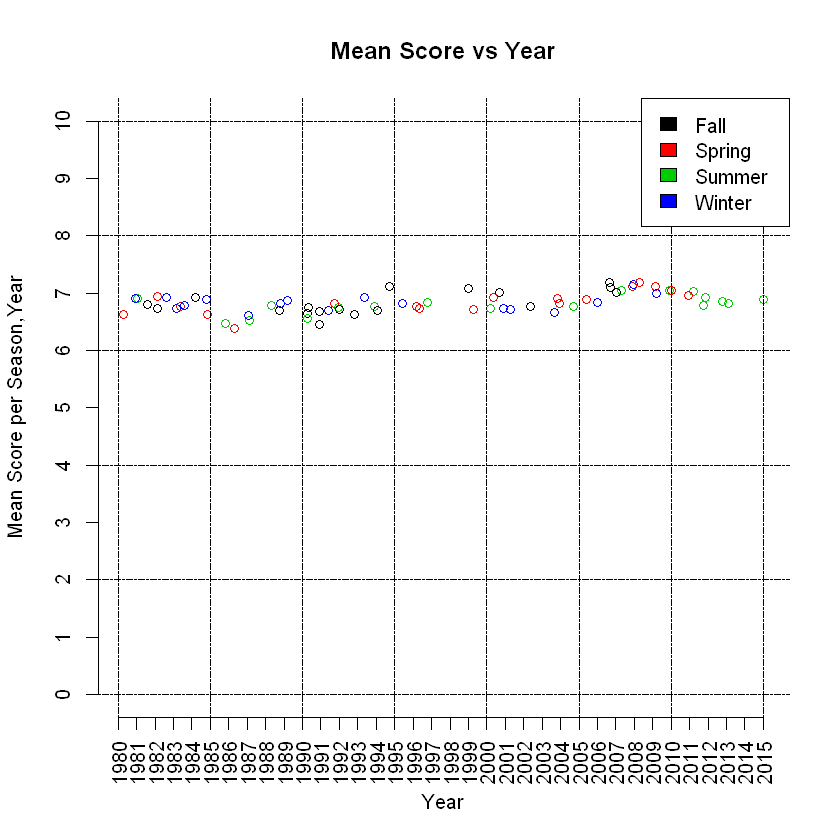

In [102]:
temp <-df[,mean(Score),by=.(Season,Year)]
plot(V1~jitter(Year,2), xlab = "",ylab="",
     temp,
     ylim=c(0,10),
     axes = FALSE,
     col=1:length(unique(temp$Season)))
title(main = 'Mean Score vs Year',xlab = 'Year',ylab = 'Mean Score per Season,Year')
grid (NULL,NULL, lty = 6, col = "black") 

axis(1,at=seq(min(temp$Year),max(temp$Year)),las=3)
axis(2,at=seq(0,10),las=3)
legend('topright',legend=levels(as.factor(temp$Season)),fill=1:length(unique(temp$Season)) )
summary(temp$V1);sd(temp$V1)

<h1>Members are the number of people who have rated a certain show.</h1><br>
This graph shows the total number of members per year. Seems as far as anime goes, the growth has been exponential after 2000

In [158]:
fitsq=lm(Members~poly(Year,2),data=members)
predsq = predict(fitsq,newdata=members)
summary(fitsq)
fitlin=lm(Members~Year,data=members)
predlin = predict(fitlin,newdata=members)
summary(fitlin)


Call:
lm(formula = Members ~ poly(Year, 2), data = members)

Residuals:
     Min       1Q   Median       3Q      Max 
-5903446  -782274    42883   301033  6985725 

Coefficients:
               Estimate Std. Error t value     Pr(>|t|)    
(Intercept)     2952293     406084   7.270 0.0000000429 ***
poly(Year, 2)1 17426271    2332775   7.470 0.0000000251 ***
poly(Year, 2)2  5904914    2332775   2.531       0.0168 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2333000 on 30 degrees of freedom
Multiple R-squared:  0.6747,	Adjusted R-squared:  0.653 
F-statistic: 31.11 on 2 and 30 DF,  p-value: 0.00000004842



Call:
lm(formula = Members ~ Year, data = members)

Residuals:
     Min       1Q   Median       3Q      Max 
-3852874 -1624982   -74473  1340541  6854080 

Coefficients:
              Estimate Std. Error t value     Pr(>|t|)    
(Intercept) -579683227   84524985  -6.858 0.0000001097 ***
Year            291782      42329   6.893 0.0000000995 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2528000 on 31 degrees of freedom
Multiple R-squared:  0.6052,	Adjusted R-squared:  0.5924 
F-statistic: 47.52 on 1 and 31 DF,  p-value: 0.00000009952


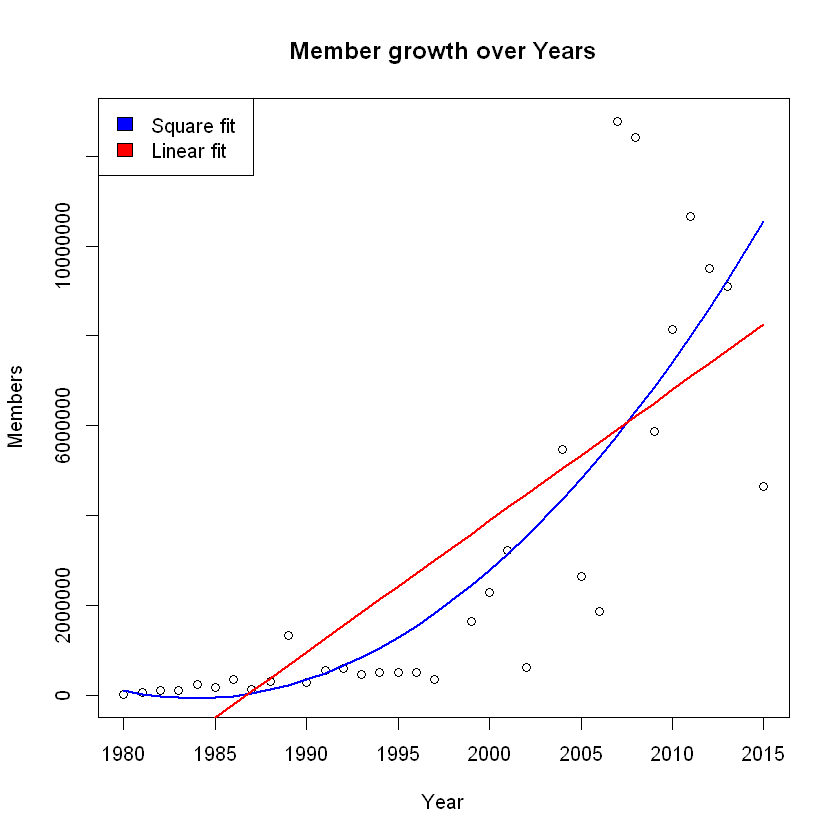

In [164]:
#df$Members <- as.numeric(gsub(",", "", df$Members))
members <- df[,lapply(.SD,sum),by=Year,.SDcols='Members']
members <- members[order(Year,Members)]

options(scipen=5)
plot(Members~Year,members)
title(main = 'Member growth over Years')
lines(members$Year,predsq,lwd=2,col='blue')
lines(members$Year,predlin,lwd=2,col='red')
legend('topleft',legend=c('Square fit','Linear fit'),fill=c('blue','red'))